----
## **<font color="crimson"> Ya ok</font>**

In [2]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install cfgrib


  Using cached cfgrib-0.9.15.0-py3-none-any.whl.metadata (55 kB)
  Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (14 kB)
  Using cached findlibs-0.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached cfgrib-0.9.15.0-py3-none-any.whl (48 kB)
Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl (7.4 MB)
Using cached findlibs-0.1.1-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install cmcrameri

  Using cached cmcrameri-1.9-py3-none-any.whl.metadata (4.6 kB)
Using cached cmcrameri-1.9-py3-none-any.whl (277 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

### **<font color="Purple"> Datos de ERA5 </font>**

##### **<font color="olive"> Concat de índice >1 y valores de gph </font>**

In [11]:
# esta es la base que tiene solo las fechas cuando el índice > 1
# es también las anomalías del ciclo anual 

In [12]:
idxp_gph_file = 'datasetsok/gph_et_indiceP+.nc'

In [13]:
idxp_gph_ds = xr.open_dataset(idxp_gph_file)

In [14]:
idxp_gph = idxp_gph_ds['z']

In [66]:
idxp_gph_vals = idxp_gph.mean(dim='time') #ya se puede mapear
idxp_gph_vals = idxp_gph_vals.sel(pressure_level=500)

In [67]:
idxp_gph_DJF =idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time')[0] 
idxp_gph_DJF = idxp_gph_DJF[0]

##### **<font color="olive"> Concat de índice <-1 y valores de gph </font>**

In [68]:
idxn_gph_file = 'datasetsok/gph_et_indiceN-.nc'

In [69]:
idxn_gph_ds = xr.open_dataset(idxn_gph_file)

In [70]:
idxn_gph = idxn_gph_ds['z']

In [71]:
idxn_gph_vals = idxn_gph.mean(dim='time') #ya se puede mapear
idxn_gph_vals = idxn_gph_vals.sel(pressure_level=500)

In [72]:
idxn_gph_season =idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time')[0] #DJF
idxn_gph_DJF = idxn_gph_season[0] #ya puedo mapear

In [73]:
g=9.807

In [74]:
idxp_gph_vals = idxp_gph_vals/g
idxp_gph_DJF = idxp_gph_DJF/g
idxn_gph_vals = idxn_gph_vals/g
idxn_gph_DJF = idxn_gph_DJF/g

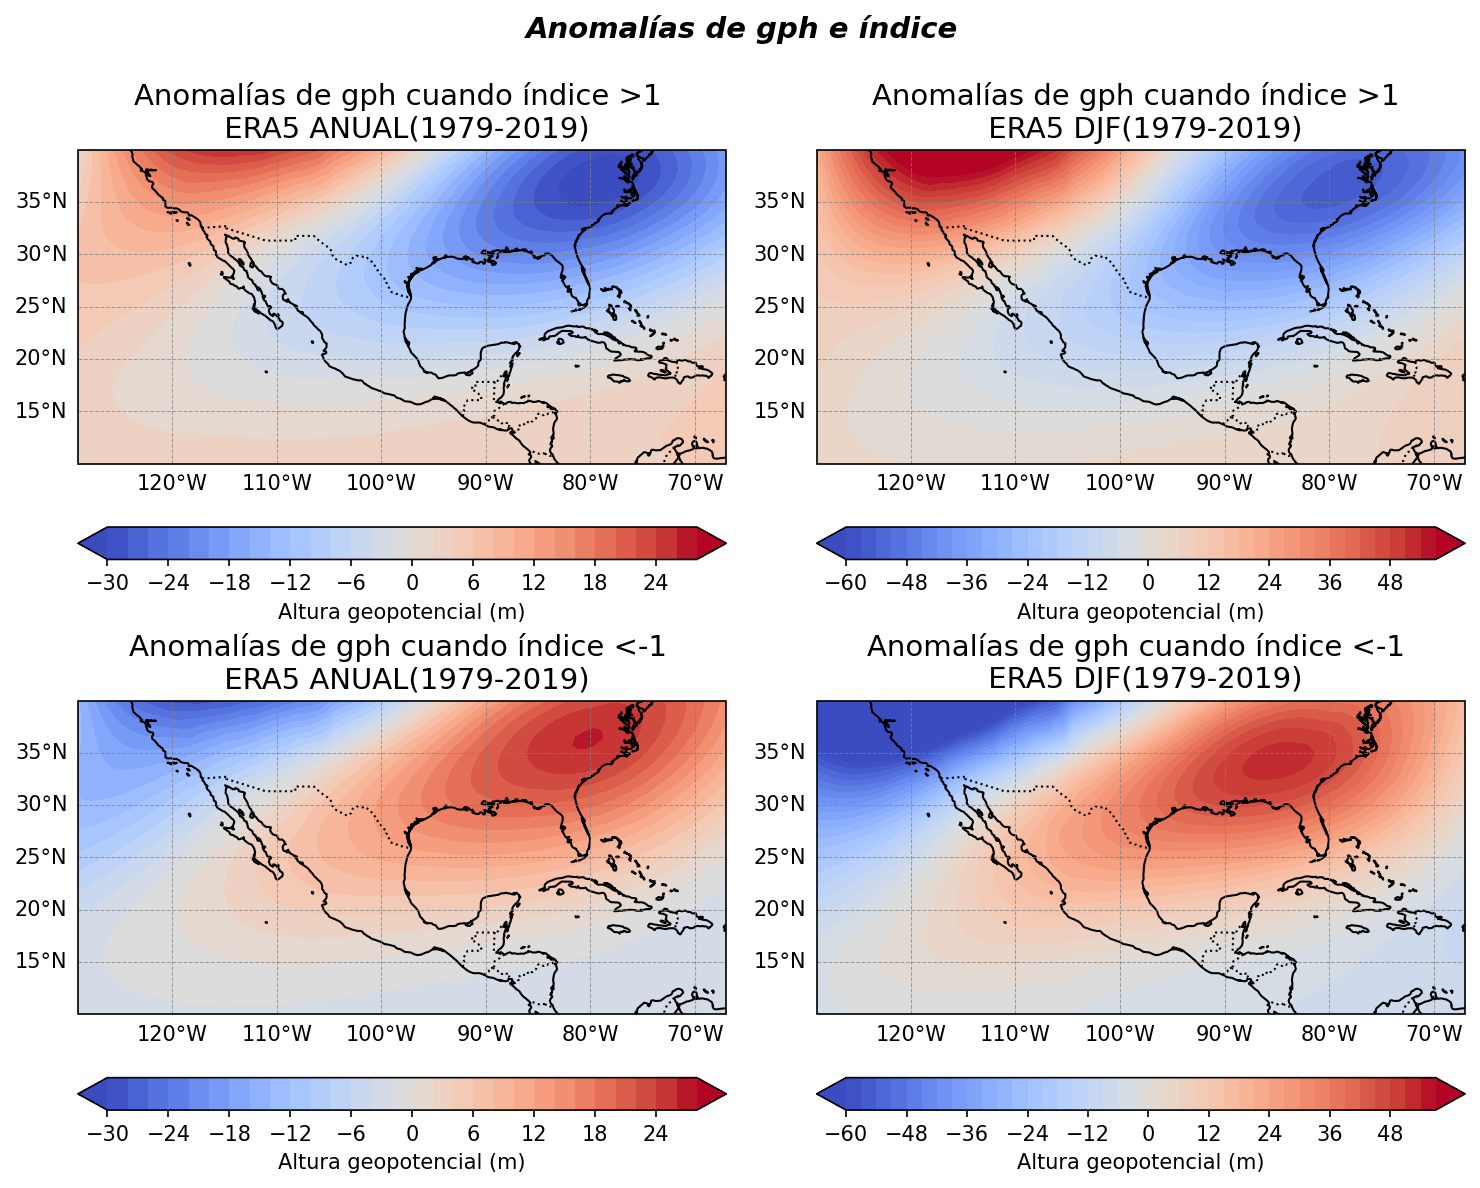

In [75]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL ÍNDICE POSITIVO
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE POSITIVO 
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_DJF.longitude,idxp_gph_DJF.latitude,idxp_gph_DJF,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 DJF(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO 
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE NEGATIVO
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_DJF.longitude,idxn_gph_DJF.latitude,idxn_gph_DJF,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 DJF(1979-2019)',fontsize=14)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
# plt.suptitle('Anomalías de gph e índice',fontsize=14,color="k",fontstyle='italic',fontweight='bold');

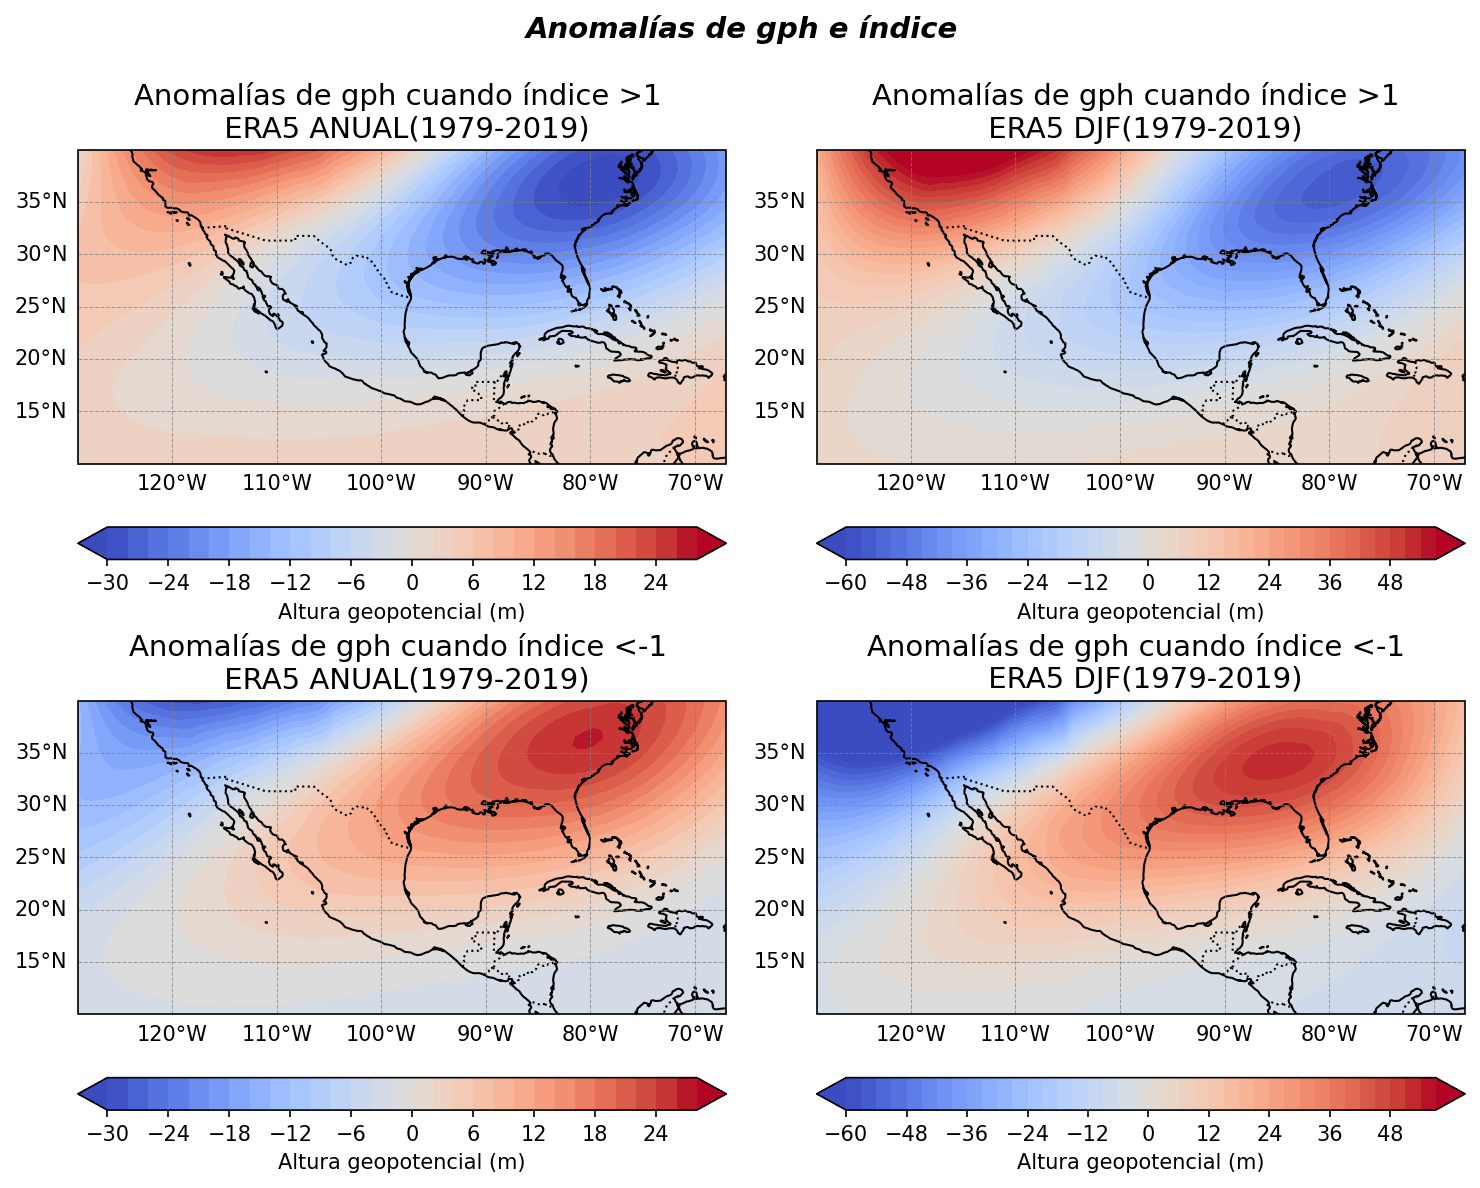

In [76]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL ÍNDICE POSITIVO
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE POSITIVO 
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 DJF(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO 
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE NEGATIVO
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 DJF(1979-2019)',fontsize=14)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
plt.suptitle('Anomalías de gph e índice',fontsize=14,color="k",fontstyle='italic',fontweight='bold');